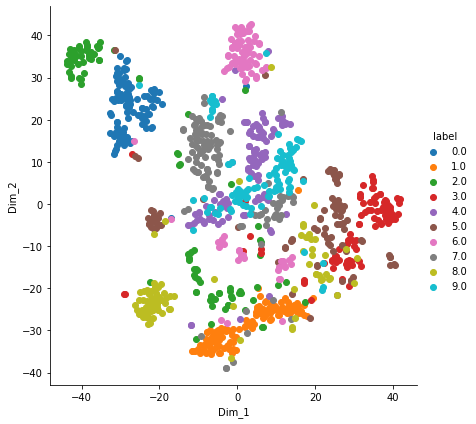

In [23]:
from keras.datasets import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

EXAMPLES = 1000
(X_train, y_train), (_, _) = mnist.load_data()

X_train = X_train[0:EXAMPLES]
X_train = X_train.reshape(EXAMPLES, 784)

y_train = y_train[0:EXAMPLES]

model = TSNE( \
    n_components=2, \
    random_state=0, \
    early_exaggeration=50, \
    learning_rate='auto', \
    init='random',
)

tsne_data = model.fit_transform(X_train)

tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6) \
    .map(plt.scatter, "Dim_1", "Dim_2") \
    .add_legend()
plt.show()